In [1]:
import os
import numpy as np
import pandas as pd

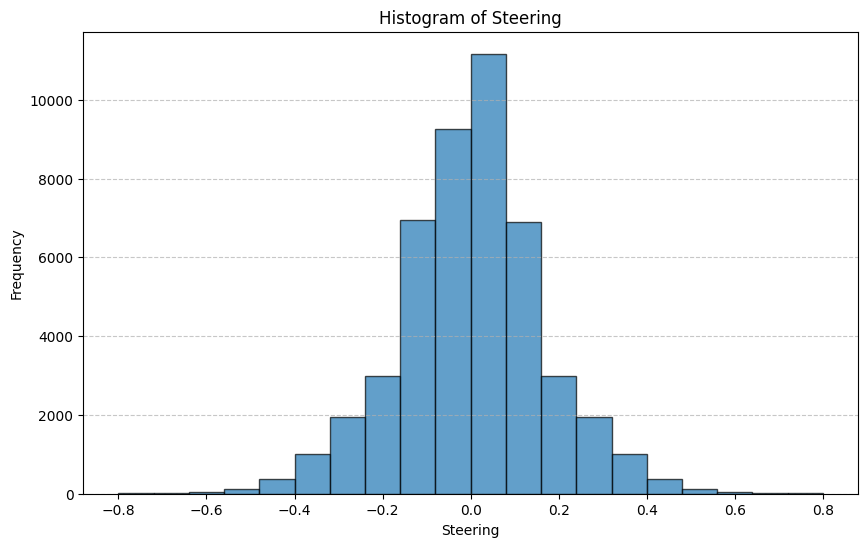

In [2]:
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = '/home/elahed/users/elahe/project_with_aws/all_steering_concat_plus_3000_plus_19000_plus_10000_normalized_4000.csv'
data = pd.read_csv(csv_file_path)
# Plot the histogram for the 'Steering' column
column_name = 'Steering'

plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {column_name}")
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

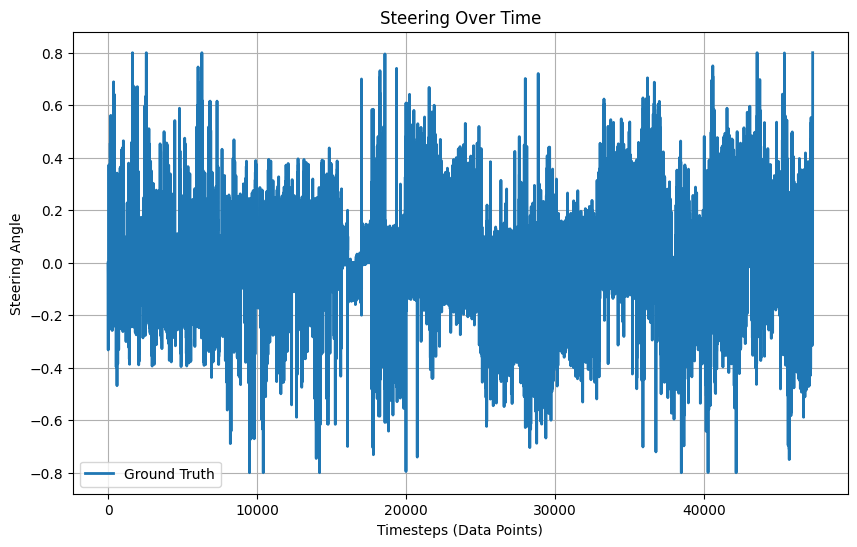

In [3]:
import numpy as np
timesteps = np.arange(len(data[column_name]))  
plt.figure(figsize=(10, 6))
plt.plot(timesteps, data[column_name], label="Ground Truth", linewidth=2)
# plt.plot(timesteps, predicted, label="Predicted", linestyle="dashed", linewidth=2)
plt.xlabel("Timesteps (Data Points)")
plt.ylabel("Steering Angle")
plt.title("Steering Over Time")
plt.legend()
plt.grid()
plt.show()

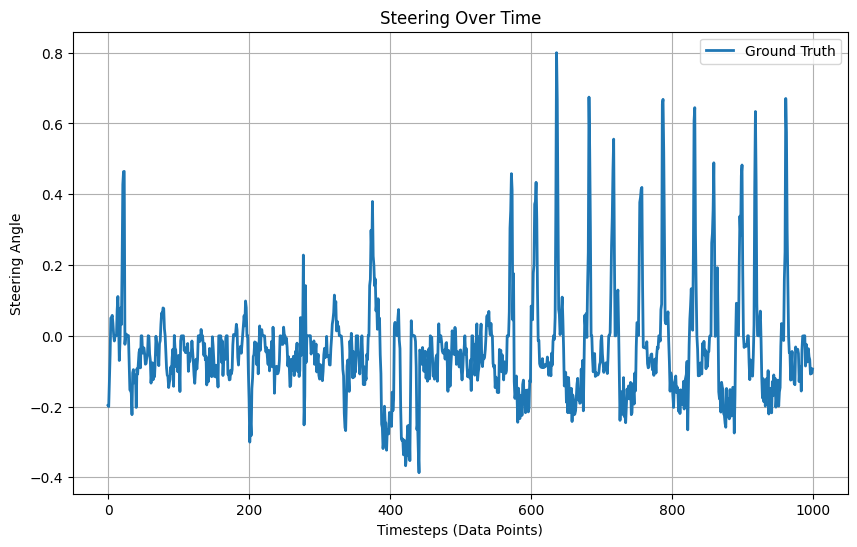

In [4]:
timesteps = np.arange(len(data[column_name][1000:2000]))  
plt.figure(figsize=(10, 6))
plt.plot(timesteps, data[column_name][1000:2000], label="Ground Truth", linewidth=2)
# plt.plot(timesteps, predicted, label="Predicted", linestyle="dashed", linewidth=2)
plt.xlabel("Timesteps (Data Points)")
plt.ylabel("Steering Angle")
plt.title("Steering Over Time")
plt.legend()
plt.grid()
plt.show()

Normalized data saved to '/home/elahed/users/elahe/project_with_aws/normalized_control_commands_4000.csv'


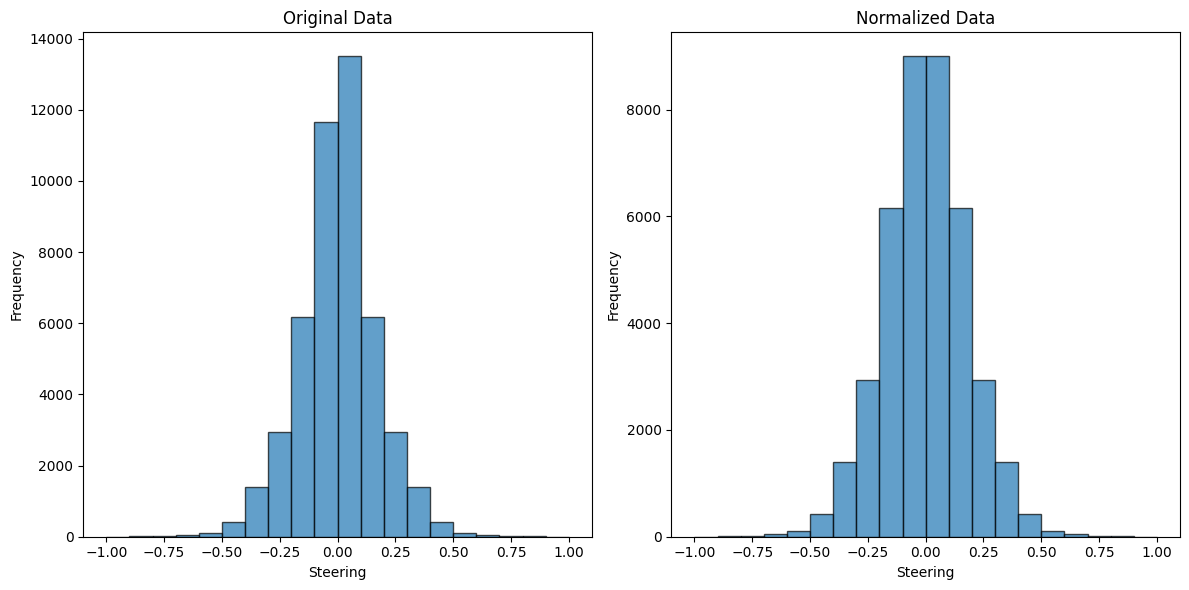

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
csv_file_path = '/home/elahed/users/elahe/project_with_aws/all_steering_concat_plus_3000_plus_19000_plus_10000_normalized_4000.csv'
df = pd.read_csv(csv_file_path)

# Define parameters
column_name = 'Steering'  # Column to normalize
num_bins = 20  # Number of bins
bin_edges = np.linspace(-1, 1, num_bins + 1)  # Bin edges from -1 to 1
max_count_per_bin = 9000  # Maximum data points per bin

# Initialize a DataFrame for the normalized data
normalized_df = pd.DataFrame()

# Normalize the data by iterating through each bin
for i in range(len(bin_edges) - 1):
    # Create a mask for the current bin
    bin_mask = (df[column_name] >= bin_edges[i]) & (df[column_name] < bin_edges[i + 1])
    bin_data = df[bin_mask]
    
    # Limit the number of data points per bin
    if len(bin_data) > max_count_per_bin:
        bin_data = bin_data.sample(n=max_count_per_bin, random_state=42)
    
    # Append the normalized data for the current bin
    normalized_df = pd.concat([normalized_df, bin_data])

# Save the normalized data to a new CSV file
normalized_csv_path = '/home/elahed/users/elahe/project_with_aws/normalized_control_commands_4000.csv'
normalized_df.to_csv(normalized_csv_path, index=False)

print(f"Normalized data saved to '{normalized_csv_path}'")

# Plot the original and normalized histograms
plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.hist(df[column_name], bins=bin_edges, alpha=0.7, edgecolor='black', label="Original Data")
plt.title("Original Data")
plt.xlabel(column_name)
plt.ylabel("Frequency")

# Normalized histogram
plt.subplot(1, 2, 2)
plt.hist(normalized_df[column_name], bins=bin_edges, alpha=0.7, edgecolor='black', label="Normalized Data")
plt.title("Normalized Data")
plt.xlabel(column_name)
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Filtered data saved to '/home/elahed/users/elahe/project_with_aws/filtered_control_commands_4000.csv'


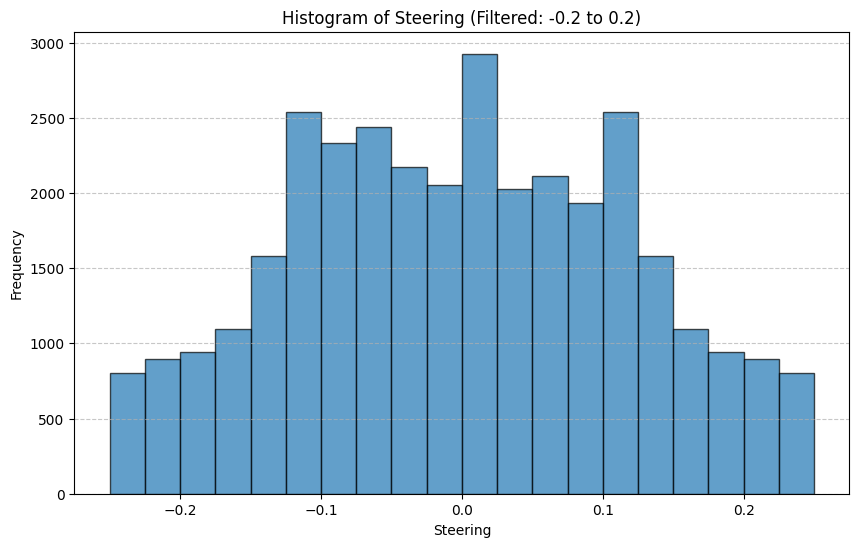

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
csv_file_path = '/home/elahed/users/elahe/project_with_aws/normalized_control_commands_4000.csv'
df = pd.read_csv(csv_file_path)

# Filter the data for steering values between -0.25 and 0.25
column_name = 'Steering'  # Column to filter
filtered_df = df[(df[column_name] >= -0.25) & (df[column_name] <= 0.25)]

# Save the filtered data to a new CSV file
filtered_csv_path = '/home/elahed/users/elahe/project_with_aws/filtered_control_commands_4000.csv'
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"Filtered data saved to '{filtered_csv_path}'")

# Plot the histogram of the filtered data
plt.figure(figsize=(10, 6))
plt.hist(filtered_df[column_name], bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {column_name} (Filtered: -0.2 to 0.2)")
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
########### data augmentation with flipping if needed #############
'''
import os
from PIL import Image
import shutil
import pandas as pd

# Define input and output directories
input_dir = "/home/elahed/users/elahe/Automatic-Data-Collector/output_front/front_rgb"
output_dir = "/home/elahed/users/elahe/Automatic-Data-Collector/output_front/augment"
csv_path = '/home/elahed/users/elahe/Automatic-Data-Collector/output_front/filtered_control_commands.csv'  # Original CSV file with image paths and steering angles
output_csv_path = "/home/elahed/users/elahe/Automatic-Data-Collector/output_front/augmented_steering_data.csv"  # New CSV for augmented data

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the CSV file containing image paths and steering angles
data = pd.read_csv(csv_path)

# Prepare a list to store all the augmented data entries
augmented_data = []

# Iterate over each row in the dataset
for idx, row in data.iterrows():
    original_path = row['Image_Fname']  # Path to the original image
    steering_angle = row['Steering']  # Steering angle
    
    # Load the original image
    img = Image.open(os.path.join(input_dir, os.path.basename(original_path+'.png')))
    
    # Save the original (unflipped) image in the new directory
    unflipped_filename = f"unflipped_{os.path.basename(original_path+'.png')}"
    unflipped_path = os.path.join(output_dir, unflipped_filename)
    img.save(unflipped_path)
    
    # Append the unflipped image data to the list
    augmented_data.append({'Image_Fname': unflipped_path, 'Steering': steering_angle})
    
    # Flip the image horizontally
    flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Save the flipped image in the new directory
    flipped_filename = f"flipped_{os.path.basename(original_path+'.png')}"
    flipped_path = os.path.join(output_dir, flipped_filename)
    flipped_img.save(flipped_path)
    
    # Reverse the steering angle (positive to negative and vice versa)
    flipped_steering_angle = -steering_angle
    
    # Append the flipped image data to the list
    augmented_data.append({'Image_Fname': flipped_path, 'Steering': flipped_steering_angle})

# Create a DataFrame for the augmented data
augmented_df = pd.DataFrame(augmented_data)

# Save the augmented data to a new CSV file
augmented_df.to_csv(output_csv_path, index=False)

print(f"Original and flipped images saved to: {output_dir}")
print(f"Augmented dataset CSV saved to: {output_csv_path}")

'''

Original and flipped images saved to: /home/elahed/users/elahe/Automatic-Data-Collector/output_front/augment
Augmented dataset CSV saved to: /home/elahed/users/elahe/Automatic-Data-Collector/output_front/augmented_steering_data.csv


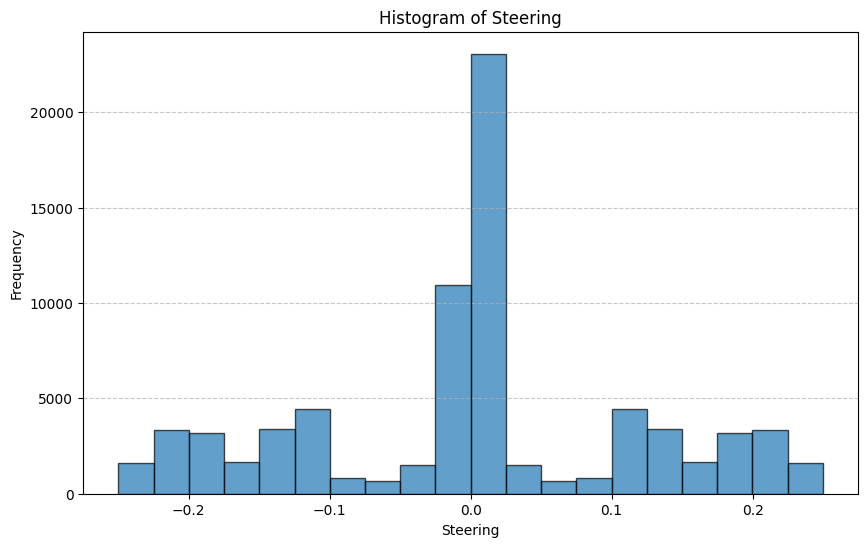

In [ ]:
'''
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = "/home/elahed/users/elahe/Automatic-Data-Collector/output_front/augmented_steering_data.csv"
data = pd.read_csv(csv_file_path)
# Plot the histogram for the 'Steering' column
column_name = 'Steering'

plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {column_name}")
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''

### Data scaling

In [7]:
import pandas as pd

# Load the CSV file
file_path = '/home/elahed/users/elahe/project_with_aws/filtered_control_commands_4000.csv'
data = pd.read_csv(file_path)

# Filter the rows with steering values between -0.25 and 0.25
#filtered_data = data[(data['Steering'] >= -0.25) & (data['Steering'] <= 0.25)]

# Multiply the steering values by 4
data['Steering'] *= 4

# Save the updated dataframe to a new CSV file
output_path = '/home/elahed/users/elahe/project_with_aws/augmented_scaled_steering_data_4000.csv'
data.to_csv(output_path, index=False)


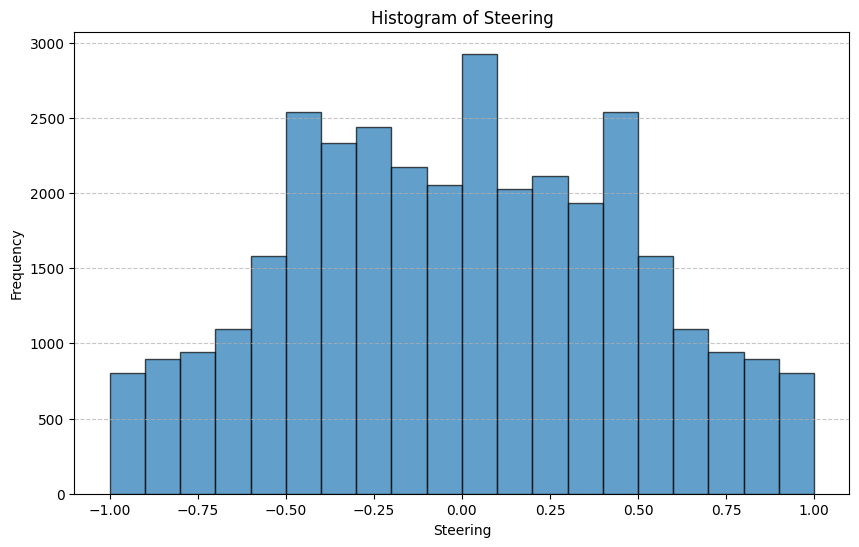

In [8]:
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = "/home/elahed/users/elahe/project_with_aws/augmented_scaled_steering_data_4000.csv"
data = pd.read_csv(csv_file_path)
# Plot the histogram for the 'Steering' column
column_name = 'Steering'

plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {column_name}")
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Data cropping

In [ ]:
import cv2

image = cv2.imread('/home/elahed/users/elahe/Automatic-Data-Collector/output/flipped_image_2024-12-05-20-05_00001718.png')
cv2.imshow("Image", image)
cv2.waitKey(0)


In [ ]:
image = cv2.imread('/home/elahed/users/elahe/Automatic-Data-Collector/output/flipped_image_2024-12-05-20-05_00001718.png')

In [4]:
from PIL import Image

def crop_image(image_path, left, top, right, bottom):
    image = Image.open(image_path)
    cropped_image = image.crop((left, top, right, bottom))  # (left, upper, right, lower)
    return cropped_image

cropped_image = crop_image("/home/elahed/users/elahe/Automatic-Data-Collector/output/flipped_image_2024-12-05-20-05_00001718.png", left=0, top=255, right=448, bottom=448)
cropped_image.show()
